# Working with Scientific Datasets

<img src="images/000_000_epom_logo.png" alt="ePOM" title="" align="center" width="12%" alt="Python logo\"></a>

Based on one of the example topics listed below (and discussions in GGE5011/GGE6302), you will design and implement a Python Jupyter Notebook practical exercise. The exercise should be modelled to fit into
the EPOM Ocean Data Science Notebook.

**Requirements**
- Follows the format described in Python Basics / 000_Welcome_on_Board
- Include an introduction to the problem or topic with relevant links to other websites, references or resources.
- Ensure that the notebook is structured with natural progression through the topic
	- Introduction, basic information, advanced information, conclusion
- The material should go above and beyond the material covered in the Ocean Data Science
notebooks
- Include sample code and solutions separated by cells.
	- All code should run without errors or warnings.
- Text should be formatted using markup language with headings, images, and links
- Post a message in Teams within the “GGE6302 Practical Exercise” channel with the topic you will be developing.

**Note:**
If you are building the notebook on Jupyter.omg.unb.ca, please inform ian.church@unb.ca if you require any additional Python libraries.

**Deliverables**
- The juypter notebook file (*.ipynb)
- The completed notebook exercise with solutions in PDF format
Feel free to select a topic not included on this list or modify one of the topics below.
- Read and display Oceanographic Data from a NetCDF files
	- Access datasets via OPeNDAP
	- Using xarray to interface with NetCDF files

---

The purpose of this notebook is to demonstrate the use of a few related standards and libraries related to working with oceanographic datasets. This involves:
- Using OPeNDAP to access online datasets directly through code
- The NetCDF file format
- Using xarray, what distinguishes it from NumPy, and how to use it with our chosen dataset

Before you start this notebook, you should make sure you have completed the numpy notebooks.

First, import some modules we will need later.

In [2]:
from pydap.client import open_url
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from erddapClient import ERDDAP_Server, ERDDAP_Tabledap
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Introduction to Xarray
Xarray is similar to numpy, but with more conveniences added. Most prominently, we can store metadata in our arrays, such as names for our array dimensions, and names for each index along each axis. We can directly use numpy arrays and features to do this.

Let's make an array (an Xarray `DataArray`) with two named dimensions


In [53]:
my_map = xr.DataArray(
    #this doesn't work, it'll make a 2x10 matrix
    #[np.linspace(0,10,10),np.linspace(0,10,10)],	
    
    #setup the multidimensional array's data
    data=np.random.randn(5,5),
    #set the names of each dimension of our array
    dims=["latitude","longitude"],
    coords={
		"latitude":[0,1,2,3,4],
		"longitude":["apple",1,"banana","tomato","lettuce"],
	}, # give some names to different indices of our arrays, as we feel like it
	name="my_map",
	attrs={"some":"metadata"}
)
my_map
#my_map.dims



<xarray.DataArray 'my_map' (latitude: 5, longitude: 5)> Size: 200B
array([[ 1.02986883e+00, -7.22316715e-01, -7.20632213e-01,
        -1.68889527e+00, -8.39265945e-02],
       [ 2.64725940e-01,  7.90398448e-04, -7.95784030e-01,
        -3.80790289e-01,  1.51009674e+00],
       [-1.87040432e-01,  1.26351130e+00, -9.82123189e-01,
         2.65479547e-01,  1.35498805e-01],
       [ 1.10994366e+00, -1.20369483e-01, -7.88433636e-01,
         7.48090982e-01, -7.91899714e-02],
       [-1.25710830e+00,  4.97191841e-01,  1.82250913e+00,
         6.20193496e-01, -2.12749478e+00]])
Coordinates:
  * latitude   (latitude) int64 40B 0 1 2 3 4
  * longitude  (longitude) <U21 420B 'apple' '1' 'banana' 'tomato' 'lettuce'
Attributes:
    some:     metadata

# NetCDF

NetCDF is a file format...

<img align="left" width="6%" style="padding-right:10px;" src="images/key.png">

Key insight

<img align="left" width="6%" style="padding-right:10px;" src="images/info.png">

Supplemental information
`code snipped` **Bold Text**

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

A test sheet with a pencil indicates the beginning of an exercise.

In [5]:

#url = "http://test.opendap.org:8080/opendap/tutorials/20220531090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"
#url = "http://www.jason.oceanobs.com/html/presentation/aviso_uk.html"
#url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/sst.mnmean.nc."
url = "https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john"
url2 = "https://dap.oceannetworks.ca/erddap/tabledap/allDatasets"
pydap_ds = open_url(url)#, protocol='dap4')

f:\git_projs\unb\MEng\GGE6302_Practical_Exercise_2\.conda\Lib\site-packages\pydap\handlers\dap.py:143: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(


In [6]:
pydap_ds.tree()

.s
└──s
   ├──station_name
   ├──time
   ├──longitude
   ├──latitude
   ├──precise_lon
   ├──precise_lat
   ├──wind_spd_avg
   ├──wind_spd_max
   ├──wind_dir_avg
   ├──air_temp_avg
   ├──air_pressure_avg
   ├──surface_temp_avg
   ├──wave_ht_max
   ├──wave_ht_sig
   ├──wave_dir_avg
   ├──wave_spread_avg
   ├──wave_period_max
   ├──curr_spd_avg
   ├──curr_dir_avg
   ├──curr_spd2_avg
   ├──curr_dir2_avg
   ├──curr_spd3_avg
   ├──curr_dir3_avg
   ├──curr_spd4_avg
   ├──curr_dir4_avg
   ├──curr_spd5_avg
   ├──curr_dir5_avg
   ├──curr_spd6_avg
   ├──curr_dir6_avg
   ├──curr_spd7_avg
   ├──curr_dir7_avg
   ├──curr_spd8_avg
   ├──curr_dir8_avg
   ├──curr_spd9_avg
   ├──curr_dir9_avg
   ├──curr_spd10_avg
   ├──curr_dir10_avg
   ├──curr_spd11_avg
   ├──curr_dir11_avg
   ├──curr_spd12_avg
   ├──curr_dir12_avg
   ├──curr_spd13_avg
   ├──curr_dir13_avg
   ├──curr_spd14_avg
   ├──curr_dir14_avg
   ├──curr_spd15_avg
   ├──curr_dir15_avg
   ├──curr_spd16_avg
   ├──curr_dir16_avg
   ├──curr_spd17_avg
 

In [7]:
pydap_ds['s']['curr_spd_avg'].attributes

{'actual_range': [1, 4633],
 'ioos_category': 'Currents',
 'long_name': 'Curr Spd Avg',
 'standard_name': 'sea_water_speed',
 'units': 'mm s-1'}

In [8]:
a = pydap_ds['s']['curr_spd_avg']
#a.dims
#a.shape
#a.units
a.actual_range
arr = a[1:10]
print(arr)
#print(arr.array[:])
print(arr.iterdata())
#for i in arr.iterdata():
#    print(i)
print(a.dtype)
#print(a.size)
#print(a.path)
#print(a.data)
#l = list(a.data)
for i in a.data:
    print(i)
#print(l)
#s = np.rec.fromrecords(list(a.data), names=a.keys())

<BaseType with data SequenceProxy('https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john', <BaseType with data BaseProxy('https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john', 's.curr_spd_avg', dtype('>i2'), (), ())>, [], (slice(1, 10, 1),))>
<generator object BaseType.__iter__ at 0x00000256F6AF4900>
>i2
0


In [ ]:
ds = open_url(url2)
ds.tree()
ds['s']['minTime']

.s
└──s
   ├──datasetID
   ├──accessible
   ├──institution
   ├──dataStructure
   ├──cdm_data_type
   ├──class
   ├──title
   ├──minLongitude
   ├──maxLongitude
   ├──longitudeSpacing
   ├──minLatitude
   ├──maxLatitude
   ├──latitudeSpacing
   ├──minAltitude
   ├──maxAltitude
   ├──minTime
   ├──maxTime
   ├──timeSpacing
   ├──griddap
   ├──subset
   ├──tabledap
   ├──MakeAGraph
   ├──sos
   ├──wcs
   ├──wms
   ├──files
   ├──fgdc
   ├──iso19115
   ├──metadata
   ├──sourceUrl
   ├──infoUrl
   ├──rss
   ├──email
   ├──testOutOfDate
   ├──outOfDate
   └──summary


<BaseType with data SequenceProxy('https://dap.oceannetworks.ca/erddap/tabledap/allDatasets', <BaseType with data BaseProxy('https://dap.oceannetworks.ca/erddap/tabledap/allDatasets', 's.minTime', dtype('>f8'), (), ())>, [], (slice(None, None, None),))>

In [10]:
erddap = ERDDAP_Server("https://www.smartatlantic.ca/erddap")
print(erddap)

<erddapClient.ERDDAP_Server>
Server version:  ERDDAP_version=2.26


In [11]:
search = erddap.search(searchFor="current")
print(search)

<erddapClient.ERDDAP_SearchResults>
Results:  71
[
  0 - <erddapClient.ERDDAP_Tabledap> SMA_saint_john , "Saint John Buoy"
  1 - <erddapClient.ERDDAP_Tabledap> eccc_opp_atlantic , "MSC Datamart realtime moored buoy data"
  2 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44490_west_bay_of_fundy , "ECCC OPP, 44490, West Bay of Fundy"
  3 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44488_east_chedabucto_bay , "ECCC OPP, 44488, East Chedabucto Bay"
  4 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44489_west_chedabucto_bay , "ECCC OPP, 44489, West Chedabucto Bay"
  5 - <erddapClient.ERDDAP_Tabledap> cna_werc_sustained_wind_2-min_avg , "2-Minute Sustained Wind Data, Lord's Cove"
  6 - <erddapClient.ERDDAP_Tabledap> uvic_onc_mun_mi_conception_bay_fluorometer , "Conception Bay Fluorometer Deployed 2021-02-14 | Conception Bay Fluorimètre déployé 2021-02-14"
  7 - <erddapClient.ERDDAP_Tabledap> SMA_halifax_anemometer1 , "Halifax Ocean Terminals: Pier 31"
  8 - <erddapClient.ERDDAP_Tabledap> SMA_saint_joh

In [12]:
table = ERDDAP_Tabledap("https://www.smartatlantic.ca/erddap", "SMA_saint_john")
#table.setResultVariables(['station_name','wind_spd_avg','wind_spd_max'])
table.addConstraint('time>=2025-10-13T00:00:00Z')
tabledap_res = xr.open_dataset(table.getData('nc'))
print(tabledap_res)
print("=========")
print(tabledap_res.keys())


<xarray.Dataset> Size: 99kB
Dimensions:           (row: 569)
Dimensions without coordinates: row
Data variables: (12/58)
    station_name      (row) object 5kB ...
    time              (row) datetime64[ns] 5kB ...
    longitude         (row) float64 5kB ...
    latitude          (row) float64 5kB ...
    precise_lon       (row) float64 5kB ...
    precise_lat       (row) float64 5kB ...
    ...                ...
    curr_dir18_avg    (row) int16 1kB ...
    curr_spd19_avg    (row) int16 1kB ...
    curr_dir19_avg    (row) int16 1kB ...
    curr_spd20_avg    (row) int16 1kB ...
    curr_dir20_avg    (row) int16 1kB ...
    wind_chill        (row) float32 2kB ...
Attributes: (12/43)
    adcp_bin_size:             1m
    adcp_blanking_distance:    1m
    adcp_head_depth:           1m
    cdm_data_type:             TimeSeries
    cdm_timeseries_variables:  station_name,longitude,latitude
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    ...                        ...
    time_c

In [16]:
res2 = xr.open_dataset("https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john")
print(res2)
print(res2['s.time'])
print(res2['s.surface_temp_avg'])

<xarray.Dataset> Size: 30MB
Dimensions:             (s: 172645)
Dimensions without coordinates: s
Data variables: (12/58)
    s.station_name      (s) object 1MB ...
    s.time              (s) datetime64[ns] 1MB ...
    s.longitude         (s) float64 1MB ...
    s.latitude          (s) float64 1MB ...
    s.precise_lon       (s) float64 1MB ...
    s.precise_lat       (s) float64 1MB ...
    ...                  ...
    s.curr_dir18_avg    (s) int16 345kB ...
    s.curr_spd19_avg    (s) int16 345kB ...
    s.curr_dir19_avg    (s) int16 345kB ...
    s.curr_spd20_avg    (s) int16 345kB ...
    s.curr_dir20_avg    (s) int16 345kB ...
    s.wind_chill        (s) float32 691kB ...
Attributes: (12/42)
    adcp_bin_size:             1m
    adcp_blanking_distance:    1m
    adcp_head_depth:           1m
    cdm_data_type:             TimeSeries
    cdm_timeseries_variables:  station_name,longitude,latitude
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    ...                       

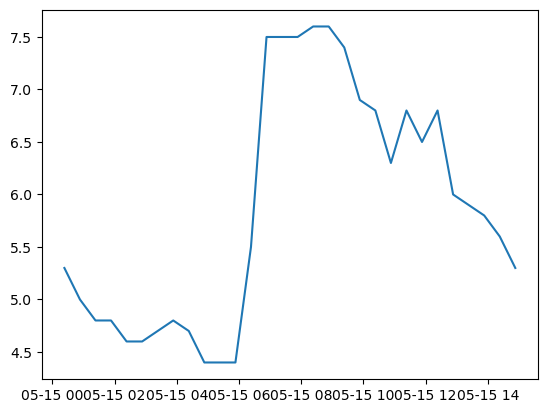

In [15]:
#rows = res2
size = 30
plt.plot(res2['s.time'][0:size], res2['s.surface_temp_avg'][0:size])

ValueError: x must be one of None, 's'. Received 's.time' instead.

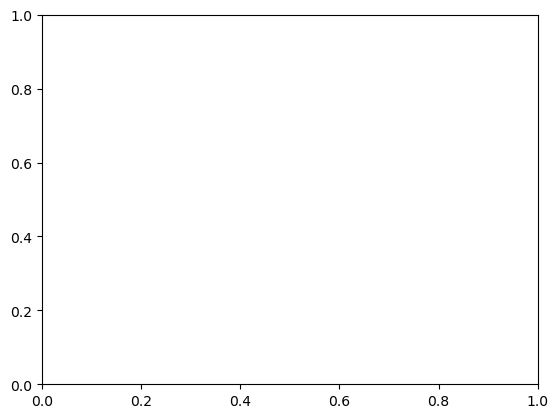

In [18]:
air_p_plot = res2['s.air_pressure_avg'].plot.line(x="s.time")

 ## <image align="left" width="6%" style="padding-right:10px;" src="images/refs.png"> Useful References and Information


- https://pydap.github.io/pydap/en/5_minute_tutorial.html
- https://github.com/hmedrano/erddap-python
- https://docs.xarray.dev/en/stable/user-guide/io.html